In [ ]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org scikit-posthocs

  Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl (13.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.0 requires numpy<2.0,>=1.19.5, but you have numpy 2.3.0 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.3.0 which is incompatible.


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']


Descriptive Statistics of Scenarios:
       Scenario CI  Scenario CII  Scenario CIII        LSTM
count        10.00         10.00          10.00       10.00
mean    2205193.68    2186055.03     2198119.27  2112052.36
std       12028.33       2673.91        8570.56      970.18
min     2184131.06    2181372.80     2183111.50  2111497.51
25%     2197280.00    2184295.82     2192480.53  2111508.98
50%     2207470.21    2186561.11     2199741.37  2111511.67
75%     2214940.09    2188221.67     2205063.90  2112038.07
max     2219165.76    2189161.04     2208074.81  2113911.52


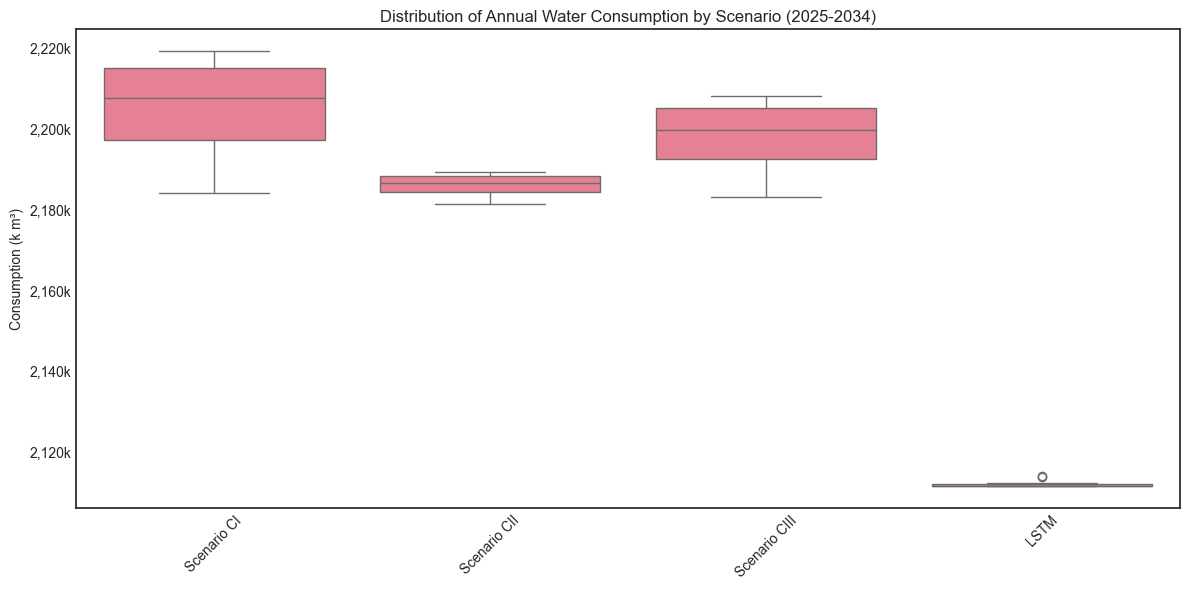

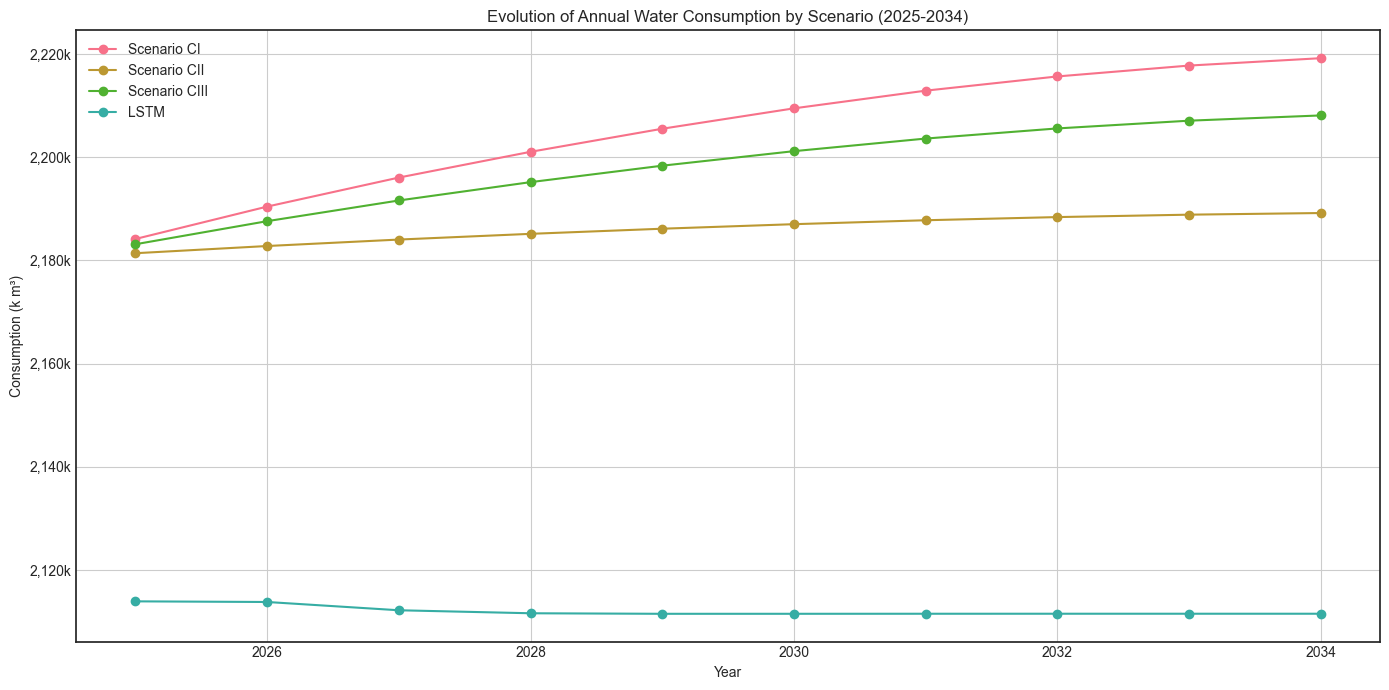

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats

# Style configuration
plt.style.use('seaborn-v0_8-white')
sns.set_palette("husl")

# 1. Load data
path = 'D:\\Python\\'
scenario_file = os.path.join(path, 'Artigo\\dados_simulacao3.csv')
df_scenarios = pd.read_csv(scenario_file)
df_scenarios.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']
df_scenarios['Date'] = pd.to_datetime(df_scenarios['Month/Year'], format='%m/%Y')
df_scenarios = df_scenarios[df_scenarios['Date'] <= pd.to_datetime('2034-12-31')]

# 2. Load LSTM predictions
lstm_file = os.path.join(path, 'Artigo\\previsoes_futuras_2025_2035.csv')
df_lstm = pd.read_csv(lstm_file, parse_dates=['Data'])
df_lstm = df_lstm[df_lstm['Data'] <= pd.to_datetime('2034-12-31')]
df_lstm = df_lstm.rename(columns={'Data': 'Date', 'Valor Previsto': 'LSTM'})

# 3. Combine data and calculate annual sums
df_combined = pd.merge(df_scenarios, df_lstm, on='Date', how='left')
df_combined['Year'] = df_combined['Date'].dt.year

# Calculate annual sums
df_annual = df_combined.groupby('Year').sum(numeric_only=True).reset_index()
scenario_period = f"{df_combined['Year'].min()}-{df_combined['Year'].max()}"

# 4. Descriptive Analysis
print("\nDescriptive Statistics of Scenarios:")
print(df_annual.drop(columns='Year').describe().round(2))

# 5. Visualization - Boxplot
plt.figure(figsize=(12, 6))
df_melted = df_annual.melt(id_vars='Year', var_name='Scenario', value_name='Consumption')
sns.boxplot(data=df_melted, x='Scenario', y='Consumption')
plt.title(f'Distribution of Annual Water Consumption by Scenario ({scenario_period})')
plt.ylabel('Consumption (k m³)')
plt.xlabel('')
plt.xticks(rotation=45)

# Format y-axis in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}k".format(int(x/1000))))
plt.tight_layout()
plt.show()

# 6. Visualization - Time Series
plt.figure(figsize=(14, 7))
for column in df_annual.columns[1:]:
    plt.plot(df_annual['Year'], df_annual[column], label=column, marker='o')
plt.title(f'Evolution of Annual Water Consumption by Scenario ({scenario_period})')
plt.ylabel('Consumption (k m³)')
plt.xlabel('Year')

# Format y-axis in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}k".format(int(x/1000))))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()